# Titanic Disaster

Not much information is known about the titanic disaster. Mostly the people survived in the crash were female and children and one with tickets at upper cabin. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read Training and Test Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Exploratory Data Analysis

Training and Test data have been copied to new variables to avoid the accidental data change. 

In [3]:
train_e = train.copy()
test_e = test.copy()

Data Dive and quick look at the features

In [4]:
train_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Passenger ID doesn't make any difference to the data training. Therefore we plan to drop it. Separating out numerical and cateogorical features.  

In [5]:
NUMERICAL_FEATURES =  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']  
CATEGORICAL_FEATURES = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
TARGET = ['Survived']

There are five numerical and five categorical features and the target variable is survived. 

In [6]:
train_e.drop(columns='PassengerId',axis=1, inplace=True)
test_e.drop(columns='PassengerId', axis=1, inplace=True)

In [7]:
test_e.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_e.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Rearranging the Columns by moving the target variable to the end

In [9]:
train_e = train_e[NUMERICAL_FEATURES + CATEGORICAL_FEATURES + TARGET]

Quick look on statistics of the numerical data

In [10]:
train_e[NUMERICAL_FEATURES].describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


Findings:

* There are 891 records in the training data set.
* Age has only 714 values out of 891. 
* The range of age was from toddler to 80 year old. 
* Majority of the sample was in Pclass 3.
* There were a few people beyond the age of 38. 
* Majority of the family is a small family only a few family had more than one sibling. 
* Number of parents/children on were mostly 0 only a few family had 6 parents/children. 
* The fare varied form the range of 0 to $513. Most of the people paid less than $31.

Checking the shape of the dataset

In [11]:
print ("There are {} observation and {} columns in training dataset".format(train_e.shape[0], train_e.shape[1]))
print ("There are {} observation and {} columns in test dataset".format(test_e.shape[0], test_e.shape[1]))

There are 891 observation and 11 columns in training dataset
There are 418 observation and 10 columns in test dataset


Finding the missing columns:

In [12]:
pd.DataFrame(train_e.isnull().sum(), columns= ['No. of missing values']).T

,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked,Survived
No. of missing values,0,177,0,0,0,0,0,0,687,2,0


In [13]:
train_e['FamilyName'] = train_e['Name'].str.split(",",expand=True)[0]
test_e['FamilyName'] = test_e['Name'].str.split(",",expand=True)[0]

In [14]:
train_e.head()

,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked,Survived,FamilyName
0,3,22.0,1,0,7.2500,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,0,Braund
1,1,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,1,Cumings
2,3,26.0,0,0,7.9250,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,1,Heikkinen
3,1,35.0,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,1,Futrelle
4,3,35.0,0,0,8.0500,"Allen, Mr. William Henry",male,373450,NaN,S,0,Allen


In [15]:
#train_e[train_e['Cabin'].isnull()]['FamilyName'].value_counts()
cabin_yes = list(train_e[train_e['Cabin'].isnull() == False]['FamilyName'])
cabin_no = list(train_e[train_e['Cabin'].isnull() == True]['FamilyName'])

In [16]:
len(list(set(cabin_no) - set(cabin_yes))) 

509

There are 509 Family Name does not have any clue about their cabin allocations. Cabin does not look significant feature. Hence carrying forward for analysis does not make any sense. 

In [17]:
train_e.drop('Cabin', axis=1, inplace=True)
test_e.drop('Cabin', axis=1, inplace=True)

In [18]:
train_e.head()

,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked,Survived,FamilyName
0,3,22.0,1,0,7.2500,"Braund, Mr. Owen Harris",male,A/5 21171,S,0,Braund
1,1,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,1,Cumings
2,3,26.0,0,0,7.9250,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,1,Heikkinen
3,1,35.0,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,1,Futrelle
4,3,35.0,0,0,8.0500,"Allen, Mr. William Henry",male,373450,S,0,Allen


In [19]:
train_e[train_e['Embarked'].isnull() == True]

,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked,Survived,FamilyName
61,1,38.0,0,0,80.0,"Icard, Miss. Amelie",female,113572,NaN,1,Icard
829,1,62.0,0,0,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,113572,NaN,1,Stone


Lets check other members of Icard and Stone family

In [20]:
train_e[(train_e['FamilyName'].isin(['Icard','Stone']) == True) & (train_e['Embarked'].isnull() == False)].shape[0]

0

There is no other family members from Icard and Stone. Pipulating it with the majority classes

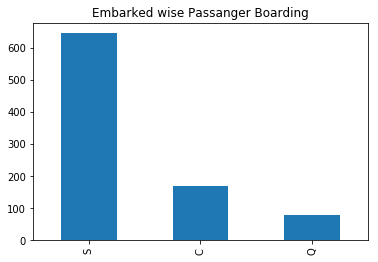

In [67]:
train_e['Embarked'].value_counts().plot(kind='bar');
plt.title('Embarked wise Passanger Boarding')
plt.show()

'S' is the Embarked where most of the people boarded. Hence populatiing missing Embarked info with 'S'

In [22]:
train_e['Embarked'].fillna('S',inplace = True)
test_e['Embarked'].fillna('S',inplace = True)

In [38]:
train_e['title'] = train_e['Name'].str.split(",",expand=True)[1].str.split(" ",expand=True)[1]
test_e['title'] = test['Name'].str.split(",",expand=True)[1].str.split(" ",expand=True)[1] 

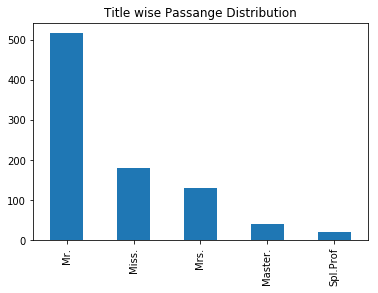

In [87]:
train_e['title'].value_counts().plot(kind='bar');
plt.title('Title wise Passange Distribution')
plt.show()

In [83]:
train_e.loc[train_e['title'].isin(['Capt.','Dr.','Rev.','Major.','Col.','the','Don.', 'Jonkheer.', 'Sir.']), 'title'] = 'Spl.Prof'

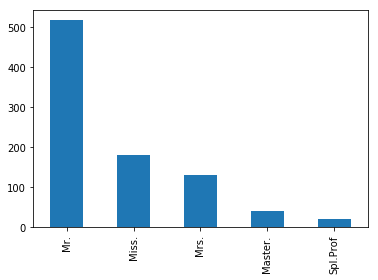

In [84]:
train_e['title'].value_counts().plot(kind='bar');

In [85]:
train_e.loc[train_e['title'].isin(['Lady.','Mme.','Ms.','Mlle.']), 'title'] = 'Mrs.'

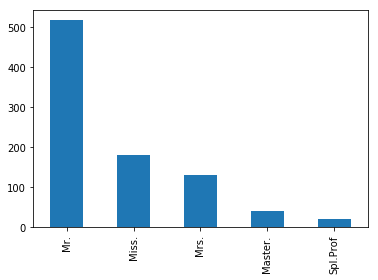

In [86]:
train_e['title'].value_counts().plot(kind='bar');

All the different titles have been grouped to form one or more new title therefore maximizing the inter class similarity. 